In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4062,ham,How are you. Its been ages. How's abj,NaN,NaN,NaN
2329,ham,Am surfing online store. For offers do you wan...,NaN,NaN,NaN
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No...",NaN,NaN,NaN
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,...",NaN,NaN,NaN
4831,ham,Rats. Hey did u ever vote for the next themes?,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2793,ham,"The affidavit says &lt;#&gt; E Twiggs St, di..."
4543,ham,when you and derek done with class?
5356,ham,Tell me something. Thats okay.
1234,ham,\Hello-/@drivby-:0quit edrunk sorry iff pthis ...
2841,ham,aathi..where are you dear..


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2271,ham,Life spend with someone for a lifetime may be ...
311,spam,Think ur smart ? Win å£200 this week in our we...
4633,ham,These won't do. Have to move on to morphine
4922,ham,Oh yah... We never cancel leh... Haha
5248,ham,U come n search tat vid..not finishd..


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep= 'first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

#EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


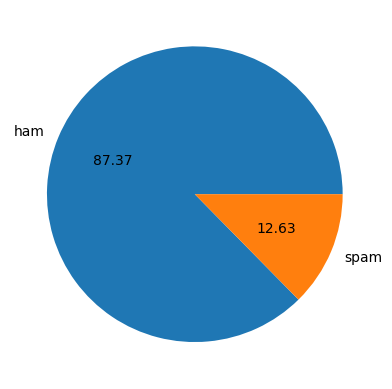

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
display(df.head())

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

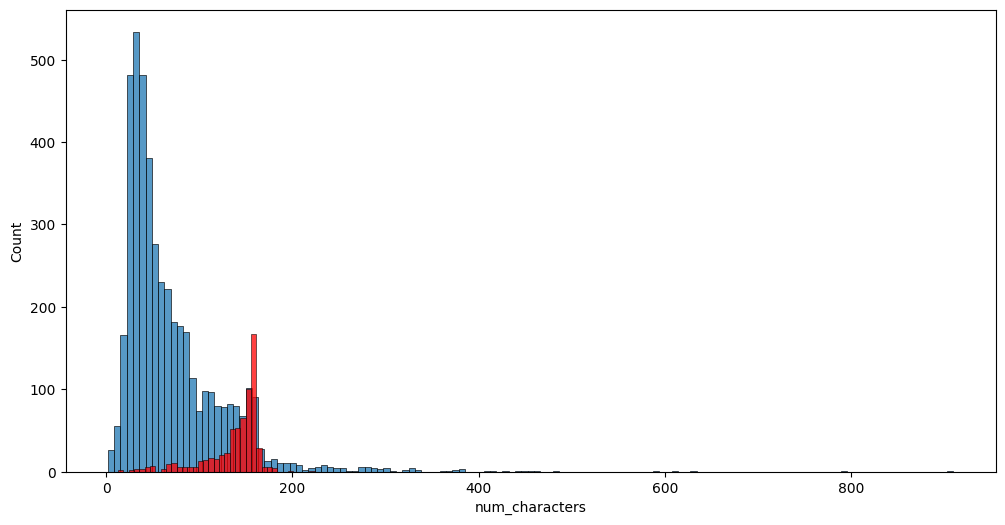

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

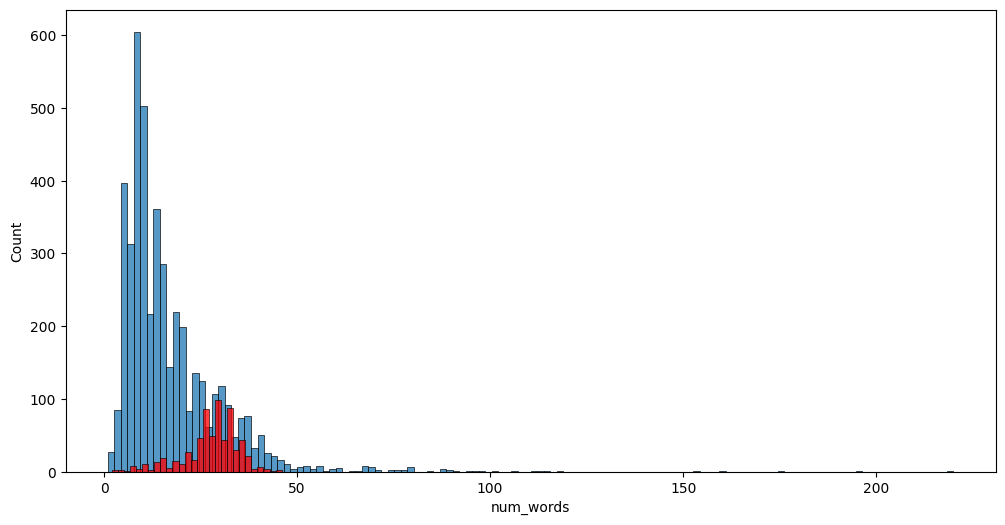

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

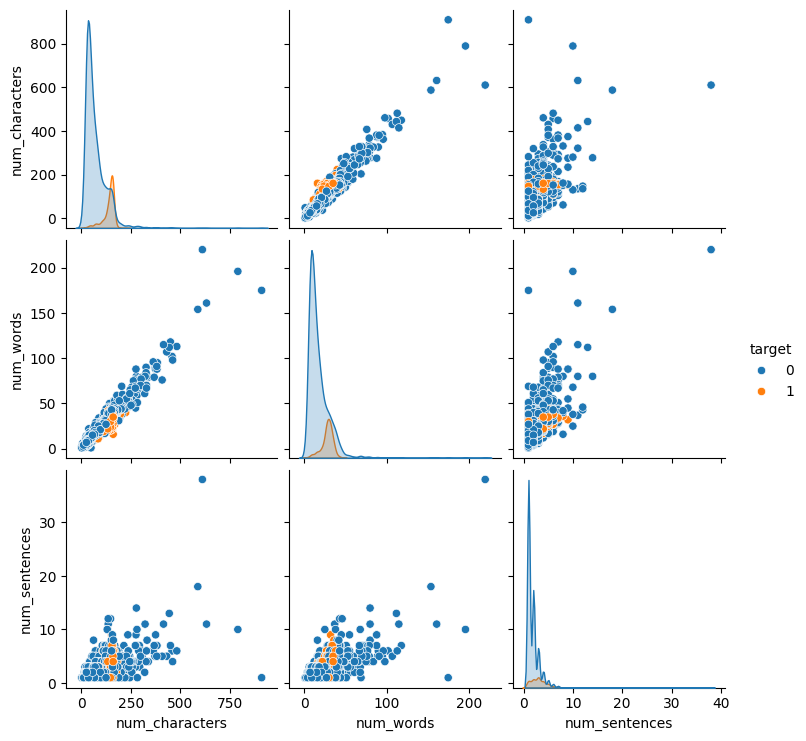

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

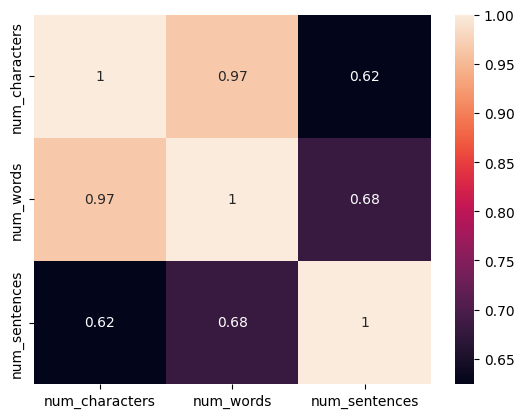

In [ ]:
sns.heatmap(df[['num_characters','num_words','num_sentences']].corr(),annot=True)

#Data Preprocessing

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

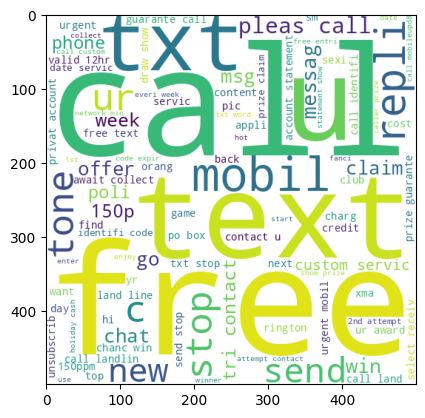

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


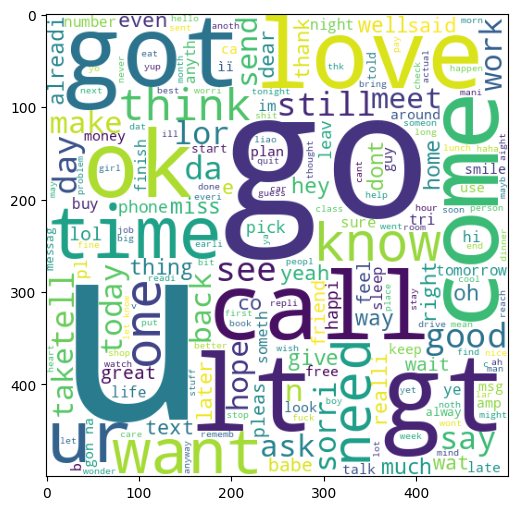

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

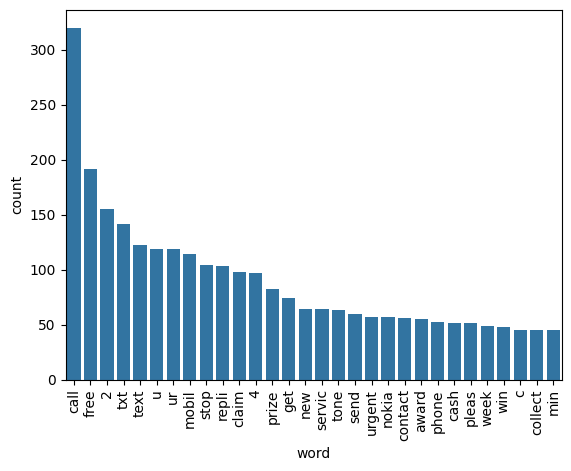

In [ ]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)


35404

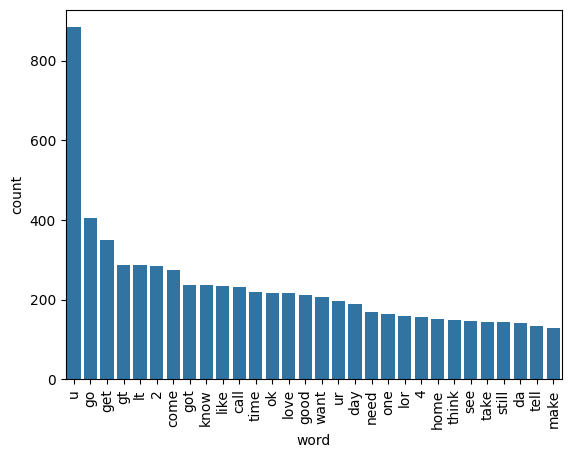

In [ ]:
from collections import Counter
most_common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_ham_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3001)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8945841392649904
[[802  94]
 [ 15 123]]
0.5668202764976958


In [ ]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[890   6]
 [ 22 116]]
0.9508196721311475


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8868471953578336
Precision -  0.8620689655172413
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For  DT
Accuracy -  0.9458413926499033
Precision -  0.8796296296296297
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9448742746615088
Precision -  0.8932038834951457
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8646616541353384
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.980658,0.983607
5,RF,0.972921,0.982456
4,LR,0.967118,0.964286
2,NB,0.972921,0.950820
10,xgb,0.971954,0.943089
9,GBDT,0.950677,0.930693
6,AdaBoost,0.944874,0.893204
3,DT,0.945841,0.879630
7,BgC,0.960348,0.864662
1,KN,0.886847,0.862069


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [ ]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.980658
1,RF,Accuracy,0.972921
2,LR,Accuracy,0.967118
3,NB,Accuracy,0.972921
4,xgb,Accuracy,0.971954
5,GBDT,Accuracy,0.950677
6,AdaBoost,Accuracy,0.944874
7,DT,Accuracy,0.945841
8,BgC,Accuracy,0.960348
9,KN,Accuracy,0.886847


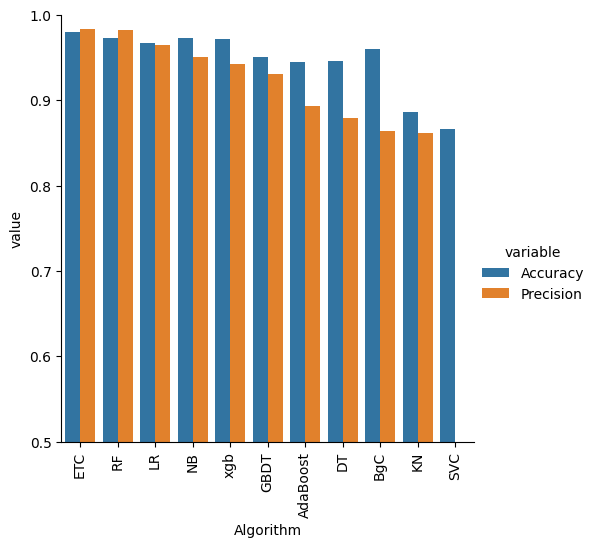

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [150]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [151]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [152]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [153]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [154]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
3,NB,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
4,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
5,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
6,AdaBoost,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
7,DT,0.945841,0.879630,0.945841,0.879630,0.945841,0.879630,0.945841,0.879630
8,BgC,0.960348,0.864662,0.960348,0.864662,0.960348,0.864662,0.960348,0.864662
9,KN,0.886847,0.862069,0.886847,0.862069,0.886847,0.862069,0.886847,0.862069


In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [156]:

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [157]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [158]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 1.0


In [159]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [160]:
from sklearn.ensemble import StackingClassifier


In [161]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [162]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9690522243713733
Precision 0.8785714285714286


In [162]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))